We will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two different tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load Data

In [2]:
data=np.loadtxt("data/ex2data2.txt",delimiter=",")

In [3]:
data[:5,:]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ],
       [-0.21371 ,  0.69225 ,  1.      ],
       [-0.375   ,  0.50219 ,  1.      ],
       [-0.51325 ,  0.46564 ,  1.      ]])

# X and Y

In [4]:
X=data[:,0:2]
X=np.hstack((np.ones((data.shape[0],1)),X))

In [5]:
X[:5,:]

array([[ 1.      ,  0.051267,  0.69956 ],
       [ 1.      , -0.092742,  0.68494 ],
       [ 1.      , -0.21371 ,  0.69225 ],
       [ 1.      , -0.375   ,  0.50219 ],
       [ 1.      , -0.51325 ,  0.46564 ]])

In [6]:
Y=data[:,2]
Y=Y.reshape((data.shape[0],1))

In [7]:
Y[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

# Visualizing the data

In [8]:
data_pos=data[data[:,2]==1]
data_neg=data[data[:,2]==0]
x1_pos=data_pos[:,0]
x2_pos=data_pos[:,1]
x1_neg=data_neg[:,0]
x2_neg=data_neg[:,1]

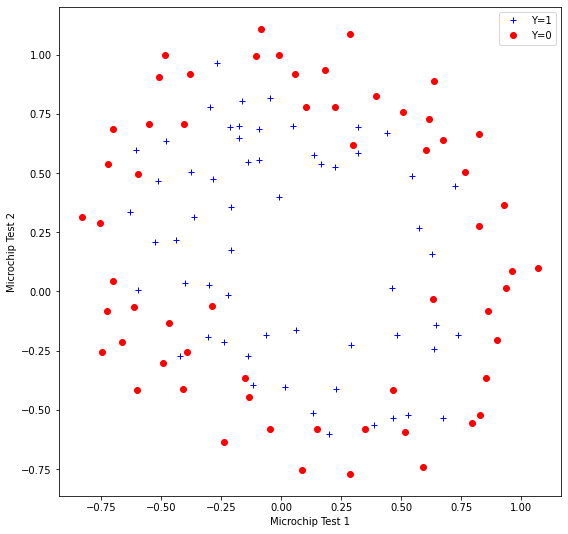

In [9]:
plt.figure(figsize=(9,9))
plt.plot(x1_pos,x2_pos,"b+",label="Y=1")
plt.plot(x1_neg,x2_neg,"ro",label="Y=0")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc="upper right");

Figure shows that our dataset cannot be separated into positive and
negative examples by a straight-line through the plot. Therefore, a straight-
forward application of logistic regression will not perform well on this dataset
since logistic regression will only be able to find a linear decision boundary.

# Feature mapping

One way to fit the data better is to create more features from each data
point.

we will map the features into
all polynomial terms of x 1 and x 2 up to the sixth power.

As a result of this mapping, our vector of two features (the scores on
two QA tests) has been transformed into a 28-dimensional vector. A logistic
regression classifier trained on this higher-dimension feature vector will have
a more complex decision boundary and will appear nonlinear when drawn in
our 2-dimensional plot.
While the feature mapping allows us to build a more expressive classifier,
it also more susceptible to overfitting.

In the next parts of the exercise, we
will implement regularized logistic regression to fit the data and also see for
yourself how regularization can help combat the overfitting problem.

In [10]:
def mapfeature(x1,x2):
    feature=np.ones((len(x1),1))
    
    degree=6
    
    for i in range(1,7):
        for j in range(0,i+1):
            out=(x1**(i-j))*(x2**j).reshape((len(x1),1))
            feature=np.hstack((feature,out))
    return feature

In [11]:
X_new=mapfeature(data[:,0].reshape((data.shape[0]),1),data[:,1].reshape((data.shape[0]),1))

In [12]:
X_new.shape

(118, 28)

# Sigmoid Function

In [13]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Cost function and gradient function

In [14]:
def costfunction(theta,X,Y,lamb):
    m=Y.shape[0]
    theta=theta.reshape((28,1))
    
    J=(-1/m)*(np.dot(Y.T,np.log(sigmoid(np.dot(X,theta)))) + np.dot(1-Y.T,np.log(sigmoid(1-np.dot(X,theta))))) + (0.5*lamb/m)*(np.dot(theta.T,theta)-theta[0,0]**2)
    J=np.ndarray.flatten(J)
    return J

In [15]:
costfunction(np.array([0 for i in range(28)]),X_new,Y,lamb=0)

array([0.49998507])

In [16]:
def gradientfunction(theta,X,Y,lamb):
    m=Y.shape[0]
    theta=theta.reshape((28,1))
    gradient=(1/m)*(np.dot(X.T,sigmoid(np.dot(X,theta)) - Y)) + (lamb/m)*theta
    gradient[0,0]=gradient[0,0]-(lamb/m)*theta[0,0]
    gradient=np.ndarray.flatten(gradient)
    return gradient

In [17]:
gradientfunction(np.array([0 for i in range(28)]),X_new,Y,lamb=0)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

# Learning parameters using fmin_ncg

In [18]:
from scipy.optimize import fmin_ncg

In [19]:
Theta=fmin_ncg(costfunction,x0=np.array([0 for i in range(28)]),fprime=gradientfunction,args=(X_new,Y,1))

         Current function value: 0.398083
         Iterations: 4
         Function evaluations: 27
         Gradient evaluations: 50
         Hessian evaluations: 0


# Predict function

In [20]:
def predict(Theta,X):
    p=sigmoid(np.dot(X,Theta))
    p[p>=0.5]=1
    p[p<0.5]=0
    return p

In [21]:
p=predict(Theta,X_new)

# Training Accuracy

In [22]:
def taccuracy(p,Y):
    return ((100-p.sum())/(100-Y.sum()))*100 

In [23]:
accuracy=taccuracy(p,Y)

In [24]:
accuracy

76.19047619047619

# Plotting the decision boundary

we will plot a contour plot for z=0

In [25]:
u=np.linspace(-1,1.5,50)
v=np.linspace(-1,1.5,50)

z=np.zeros((len(u),len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j]=np.dot(mapfeature(np.array([u[i]]),np.array([v[j]])),Theta)

In [26]:
z.shape

(50, 50)

Text(0.5, 1.0, 'Decision Boundary')

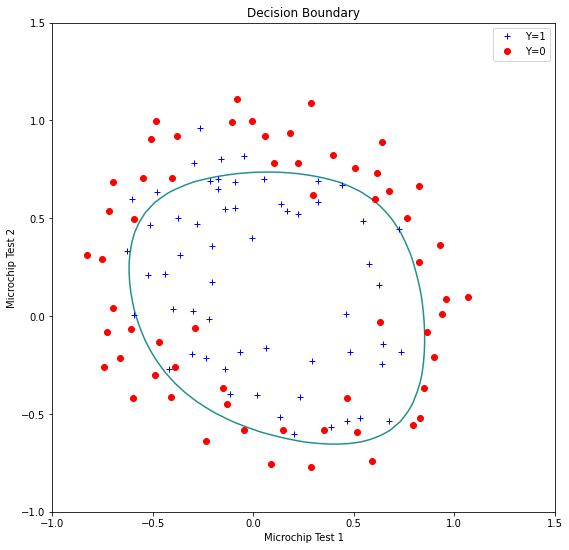

In [27]:
x1, y1 = np.meshgrid(u, v)
plt.figure(figsize=(9,9))
plt.plot(x1_pos,x2_pos,"b+",label="Y=1")
plt.plot(x1_neg,x2_neg,"ro",label="Y=0")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")
plt.legend(loc="upper right"); 
plt.contour(x1,y1,z,levels=0)
plt.title("Decision Boundary")

# Thank You